In [73]:
#Loading Datsets into respective dataframes using Pandas
import pandas as pd
import matplotlib.pyplot as plt
industry = pd.read_csv('industry_client_details.csv')
subscription = pd.read_csv('subscription_information.csv')
payment = pd.read_csv('payment_information.csv')
financial = pd.read_csv('finanical_information.csv')

In [74]:
# 1.How many finance lending and blockchain clients does the organization have?
count_finance_lending=industry[industry["industry"]=="Finance Lending"]["client_id"].nunique() #Counts Unique Client_Id who belongs to Finance Lending
count_blockchain=industry[industry["industry"]=="Block Chain"]["client_id"].nunique() #Counts Unique Client_Id who belongs to Block Chain
print(f"Organisation have {count_finance_lending} finance lending clients and {count_blockchain} blockchain clients")#Printing the result



Organisation have 22 finance lending clients and 25 blockchain clients


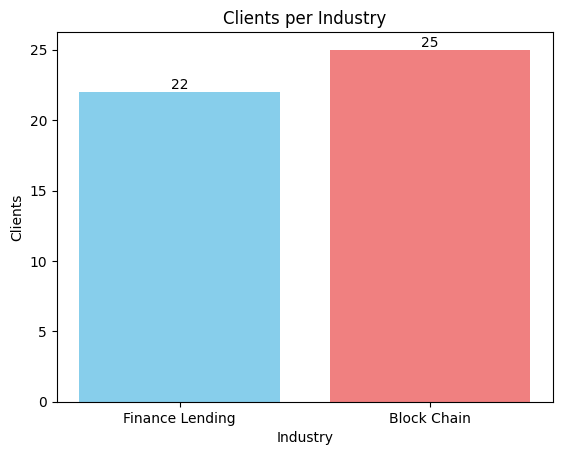

In [75]:
#Plot for 1st question
industries = ['Finance Lending', 'Block Chain'] #List of industries
counts = [count_finance_lending, count_blockchain] #List of counts
plt.bar(industries, counts, color=['skyblue', 'lightcoral']) #Plotting the bar chart
plt.xlabel("Industry") #Label for the x-axis
plt.ylabel("Clients") #Label for the y-axis
plt.title("Clients per Industry") #Title of the plot
plt.xticks(industries) #Labeling the x-axis
[plt.text(i, count, str(count), ha='center', va='bottom') for i, count in enumerate(counts)] #Adding text labels to the bars
plt.show() #Displaying the plot 

In [76]:
# 2.Which industry in the organization has the highest renewal rate?
subscription_industry = pd.merge(industry, subscription, on='client_id')#combining industry and subscription DataFrames with client_id being the common field
renewal_rates =subscription_industry.groupby('industry')['renewed'].mean() * 100#Groups the data by industry by calculating the renewed column(True as 1 and False as 0) and then multiplying by 100 to get the percentage
renewal_rates = renewal_rates.sort_values(ascending=False)#Sorting the values in descending order           
renewal_rates.head(1)#Printing the top 1 industry with the highest renewal rate


industry
Gaming    72.727273
Name: renewed, dtype: float64

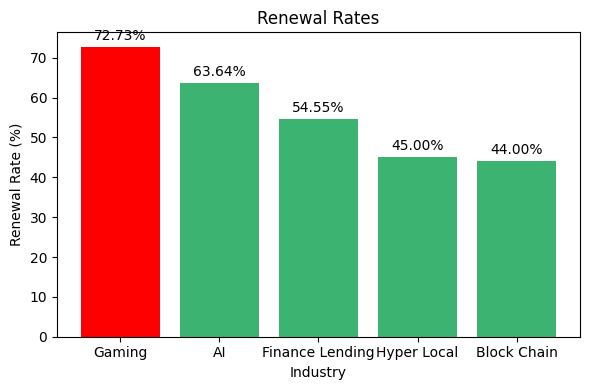

In [77]:
#Plot for 2nd question
top_industry = renewal_rates.idxmax()#Finding the industry with the highest renewal rate
colors = ['red' if i == top_industry else 'mediumseagreen' for i in renewal_rates.index]#Creating a list of colors for the bars
plt.figure(figsize=(6, 4))#Setting the size of the plot
bars = plt.bar(renewal_rates.index, renewal_rates.values, color=colors)#Plotting the bar chart
plt.xlabel("Industry")#Label for the x-axis
plt.ylabel("Renewal Rate (%)")#Label for the y-axis
plt.title("Renewal Rates")#Title of the plot
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, f'{bar.get_height():.2f}%', ha='center', va='bottom')#Adding text labels to the bars
plt.tight_layout()#Adjusting the layout of the plot
plt.show()#Displaying the plot

In [78]:
# 3.What was the average inflation rate when their subscriptions were renewed?
subscription_financial = pd.merge(subscription, financial, on='start_date', how='left')#Merges subscription and financial DataFrames with start_date being the common field 
renewed_subscriptions = subscription_financial[subscription_financial['renewed'] == True]#Filters the data to include only the rows where the subscription was renewed
avg_inflation = renewed_subscriptions['inflation_rate'].mean()#Calculates the mean of the inflation_rate column for the filtered data
print(f"Average inflation rate during subscription renewals: {avg_inflation:.2f}%")#Printing the result

Average inflation rate during subscription renewals: 3.84%


In [79]:
# 4.What is the median amount paid each year for all payment methods? 
payment['payment_date'] = pd.to_datetime(payment['payment_date'])#Converts the payment_date column to datetime format
payment['year'] = payment['payment_date'].dt.year#Creates a new year column by extracting the year from the payment_date column
median_payments = payment.groupby(['year', 'payment_method'])['amount_paid'].median().unstack()#Groups the data by year and payment_method and calculates the median of the amount_paid column
print(median_payments)#Printing the result

payment_method  Bank Transfer  Check  Credit Card
year                                             
2018                   281.65  216.6       229.15
2019                   184.20  410.2       401.90
2020                   225.10  413.1       285.25
2021                   255.30  435.1       208.70
2022                   196.50  275.5       326.20


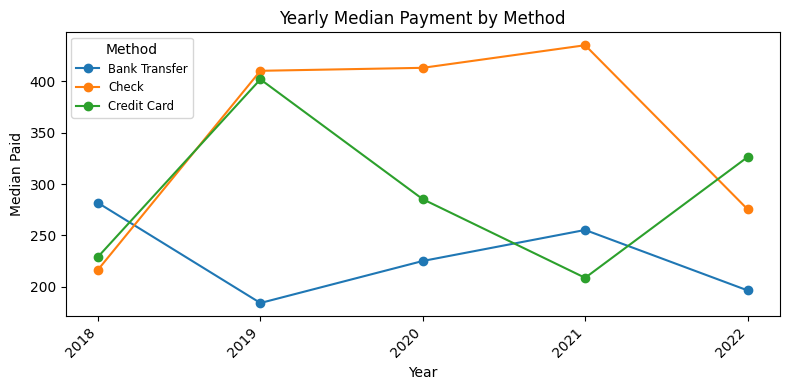

In [80]:
#Plot for 4th question
plt.figure(figsize=(8, 4))
for method in median_payments.columns:#Looping through each column in the median_payments DataFrame         
    plt.plot(median_payments.index, median_payments[method], marker='o', label=method)#Plotting the data for each method
plt.xlabel("Year")#Label for the x-axis
plt.ylabel("Median Paid")#Label for the y-axis
plt.title("Yearly Median Payment by Method")#Title of the plot  
plt.xticks(np.floor(median_payments.index).astype(int), rotation=45, ha='right')#Setting the x-axis ticks to the year values
plt.legend(title="Method", fontsize='small')#Adding a legend to the plot
plt.tight_layout()#Adjusting the layout of the plot
plt.show()#Displaying the plot